<a href="https://colab.research.google.com/github/hoenickf/school-of-ai-exercise1-autoencoder/blob/master/school_of_ai_exercise1_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Import MNIST data set (handwritten digits)
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
# Training Parameters
learning_rate = 0.01
num_steps = 20000
batch_size = 128

display_step = 500
examples_to_show = 10

# Network Parameters
num_hidden_1 = 128 # 1st layer num features
num_hidden_2 = 64 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

In [0]:
# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

In [0]:
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

In [0]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


In [0]:
# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

In [0]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)


In [0]:
# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

In [0]:
# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

In [0]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


Step 1: Minibatch Loss: 0.429188
Step 500: Minibatch Loss: 0.093347
Step 1000: Minibatch Loss: 0.076530
Step 1500: Minibatch Loss: 0.063407
Step 2000: Minibatch Loss: 0.058908
Step 2500: Minibatch Loss: 0.053061
Step 3000: Minibatch Loss: 0.053453
Step 3500: Minibatch Loss: 0.048860
Step 4000: Minibatch Loss: 0.048389
Step 4500: Minibatch Loss: 0.044984
Step 5000: Minibatch Loss: 0.039618
Step 5500: Minibatch Loss: 0.041616
Step 6000: Minibatch Loss: 0.037721
Step 6500: Minibatch Loss: 0.037601
Step 7000: Minibatch Loss: 0.036183
Step 7500: Minibatch Loss: 0.036102
Step 8000: Minibatch Loss: 0.032661
Step 8500: Minibatch Loss: 0.033785
Step 9000: Minibatch Loss: 0.032245
Step 9500: Minibatch Loss: 0.031895
Step 10000: Minibatch Loss: 0.030826
Step 10500: Minibatch Loss: 0.029469
Step 11000: Minibatch Loss: 0.030900
Step 11500: Minibatch Loss: 0.029036
Step 12000: Minibatch Loss: 0.030016
Step 12500: Minibatch Loss: 0.027480
Step 13000: Minibatch Loss: 0.029481
Step 13500: Minibatch Los

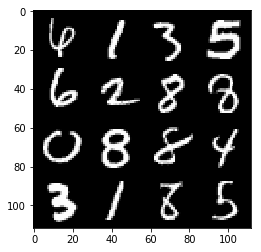

Reconstructed Images


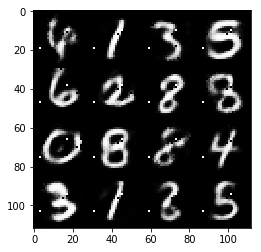

In [38]:
# Start Training
# Start a new TF session
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training
    for i in range(1, num_steps+1):
        # Prepare Data
        # Get the next batch of MNIST data (only images are needed, not labels)
        batch_x, _ = mnist.train.next_batch(batch_size)

        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
        # Display logs per step
        if i % display_step == 0 or i == 1:
            print('Step %i: Minibatch Loss: %f' % (i, l))

    # Testing
    # Encode and decode images from test set and visualize their reconstruction.
    n = 4
    canvas_orig = np.empty((28 * n, 28 * n))
    canvas_recon = np.empty((28 * n, 28 * n))
    for i in range(n):
        # MNIST test set
        batch_x, _ = mnist.test.next_batch(n)
        # Encode and decode the digit image
        g = sess.run(decoder_op, feed_dict={X: batch_x})

        # Display original images
        for j in range(n):
            # Draw the original digits
            canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                batch_x[j].reshape([28, 28])
        # Display reconstructed images
        for j in range(n):
            # Draw the reconstructed digits
            canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                g[j].reshape([28, 28])

    print("Original Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_orig, origin="upper", cmap="gray")
    plt.show()

    print("Reconstructed Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_recon, origin="upper", cmap="gray")
    plt.show()